In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [60]:
data=pd.read_csv('indian_liver_patient.csv')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1636 non-null   int64  
 1   Gender                      1636 non-null   object 
 2   Total_Bilirubin             1636 non-null   float64
 3   Direct_Bilirubin            1636 non-null   float64
 4   Alkaline_Phosphotase        1636 non-null   int64  
 5   Alamine_Aminotransferase    1636 non-null   int64  
 6   Aspartate_Aminotransferase  1636 non-null   int64  
 7   Total_Protiens              1636 non-null   float64
 8   Albumin                     1636 non-null   float64
 9   Albumin_and_Globulin_Ratio  1624 non-null   float64
 10  Dataset                     1636 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 140.7+ KB


In [62]:
data.head(10)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [63]:
data.tail(10)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1626,22,Female,2.2,1.0,215,159,51,5.5,2.5,0.80,1
1627,28,Female,0.8,0.2,309,55,23,6.8,4.1,1.51,1
1628,38,Male,0.7,0.2,110,22,18,6.4,2.5,0.64,1
1629,25,Male,0.8,0.1,130,23,42,8.0,4.0,1.00,1
1630,45,Female,0.7,0.2,164,21,53,4.5,1.4,0.45,2
1631,45,Female,0.6,0.1,270,23,42,5.1,2.0,0.50,2
1632,28,Female,0.6,0.1,137,22,16,4.9,1.9,0.60,2
1633,28,Female,1.0,0.3,90,18,108,6.8,3.1,0.80,2
1634,66,Male,1.0,0.3,190,30,54,5.3,2.1,0.60,1
1635,66,Male,0.8,0.2,165,22,32,4.4,2.0,0.80,1


In [64]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1624.000000,1636.000000
mean,44.727995,3.114792,1.387286,293.103912,80.944377,109.261614,6.468032,3.146577,0.949292,1.288509
std,16.295775,5.955451,2.631630,248.412910,186.409237,295.985465,1.089651,0.797600,0.311319,0.453207
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.700000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.500000,3.100000,0.960000,1.000000
75%,58.000000,2.400000,1.200000,298.000000,60.000000,85.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [65]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [66]:
data.isnull().sum()


Age                            0
Gender                         0
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                 0
Albumin                        0
Albumin_and_Globulin_Ratio    12
Dataset                        0
dtype: int64

In [67]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])

In [68]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

No of Males: 1229
no of Females: 407


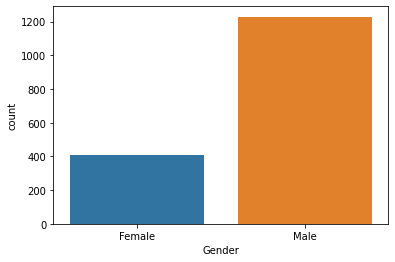

In [69]:
sns.countplot(data=data,x='Gender',label='Count')
m,f=data['Gender'].value_counts()
print("No of Males:",m)
print("no of Females:",f)

liver disease patients: 1164
non-liver disease patients: 472


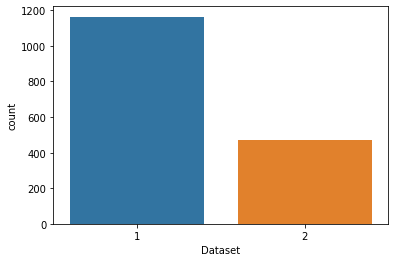

In [70]:
sns.countplot(data=data,x='Dataset')
LD,NLD=data['Dataset'].value_counts()
print("liver disease patients:",LD)
print("non-liver disease patients:",NLD)

In [71]:
def partition(x):
    if x=='Male':
        return 1
    return 0
data['Gender']=data['Gender'].map(partition)


In [72]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
1631,45,0,0.6,0.1,270,23,42,5.1,2.0,0.50,2
1632,28,0,0.6,0.1,137,22,16,4.9,1.9,0.60,2
1633,28,0,1.0,0.3,90,18,108,6.8,3.1,0.80,2
1634,66,1,1.0,0.3,190,30,54,5.3,2.1,0.60,1


In [73]:
def partition(x):
    if x==2:
        return 0
    return 1
data['Dataset']=data['Dataset'].map(partition)


In [74]:
data['Dataset']

0       1
1       1
2       1
3       1
4       1
       ..
1631    0
1632    0
1633    0
1634    1
1635    1
Name: Dataset, Length: 1636, dtype: int64

In [75]:
x=data.drop(columns='Dataset',axis=1)
y=data['Dataset']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [77]:
print(x.shape,x_train.shape,x_test.shape)

(1636, 10) (1145, 10) (491, 10)


In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(x_train)
xtest=sc.transform(x_test)

In [79]:
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm


In [80]:
random_state = 42
classifier = [KNeighborsClassifier(),
              DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             ]

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}


rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
               "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}
classifier_param = [knn_param_grid,
                    dt_param_grid,
                   rf_param_grid,
                   ]




In [81]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_ * 100)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])


Fitting 10 folds for each of 40 candidates, totalling 400 fits
94.58428680396644
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
88.55835240274601
Fitting 10 folds for each of 54 candidates, totalling 540 fits
94.49885583524026


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cross Validation Scores')

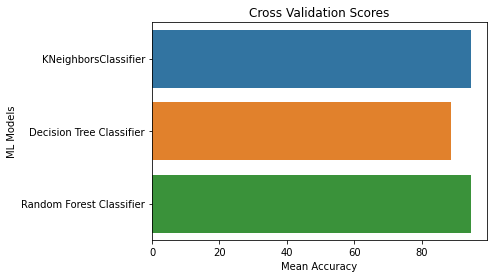

In [82]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "KNeighborsClassifier", "Decision Tree Classifier",
             "Random Forest Classifier",
            ]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")


In [83]:
best_estimators

[KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance'),
 DecisionTreeClassifier(max_depth=17, min_samples_split=10, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=1, min_samples_split=10,
                        random_state=42)]

In [84]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
y_head_knn = knn.predict(x_test)

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_head_dt = dt.predict(x_test)

rf = RandomForestClassifier(n_estimators = 250, random_state = 1)
rf.fit(x_train,y_train)
y_head_rf = rf.predict(x_test)


Ensemble Model accuracy score: 95.93%
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.98      0.97      0.97       349

    accuracy                           0.96       491
   macro avg       0.95      0.95      0.95       491
weighted avg       0.96      0.96      0.96       491



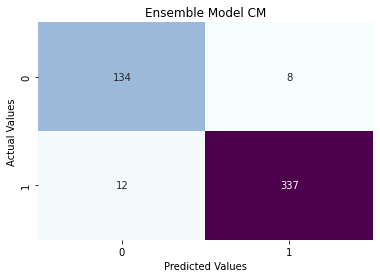

array([[134,   8],
       [ 12, 337]])

In [85]:
votingC = VotingClassifier(estimators = [("knn",best_estimators[0]),
                                        ("dt",best_estimators[1]),
                                        ("rf",best_estimators[2])],
                                        voting = "hard", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
y_pred=votingC.predict(x_test)
my_confusion_matrix(y_test, y_pred, 'Ensemble Model CM', 'Ensemble Model')
